In [2]:
%matplotlib notebook
%precision 3

import pandas as pd
import folium
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from datetime import datetime
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [9, 7]
plt.rcParams['timezone'] = 'Europe/London'

In [6]:
data=pd.read_csv("csvdata.csv",skipinitialspace=True)
data["datetime"]=pd.to_datetime(data["Unixtime"], unit='s')
data.set_index("datetime", inplace=True)
# data["opper"] = ((data["vAccuracy"]/2) * (data["hAccuracy"]/2) * 3.14)
# data = data['2020-11-02':]
data = data['2020-11-17']
data



,Unixtime,RawVoltage,boardtemp,Lat,Long,Alt,Speed,Course,Satelites,SecondsToFix,hAccuracy,vAccuracy,DateTime,CalcVoltage,CalcLat,CalcLong,Unnamed: 16
datetime,,,,,,,,,,,,,,,,,
2020-11-17 00:00:07,1605571207,104,15,513866617,-4080595,2,0,0,6,0,12885,11808,2020-11-17 00:00:07,3.611765,51.386662,-0.408059,NaN
2020-11-17 00:01:07,1605571267,104,15,513867166,-4080486,9,0,11,7,0,10771,11427,2020-11-17 00:01:07,3.611765,51.386717,-0.408049,NaN
2020-11-17 00:02:07,1605571327,104,15,513867401,-4080644,12,0,14,6,0,12459,12991,2020-11-17 00:02:07,3.611765,51.386740,-0.408064,NaN
2020-11-17 00:03:07,1605571387,104,15,513868046,-4080840,13,4,14,6,0,25617,22190,2020-11-17 00:03:07,3.611765,51.386805,-0.408084,NaN
2020-11-17 00:04:07,1605571447,104,15,513867069,-4080692,4,0,5,6,0,31094,26984,2020-11-17 00:04:07,3.611765,51.386707,-0.408069,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17 11:11:08,1605611468,91,20,513866920,-4080412,19,0,12,5,1,7952,29744,2020-11-17 11:11:08,3.535294,51.386692,-0.408041,NaN
2020-11-17 11:12:08,1605611528,91,20,513867032,-4080681,3,0,2,4,1,9228,22999,2020-11-17 11:12:08,3.535294,51.386703,-0.408068,NaN
2020-11-17 11:13:08,1605611588,91,20,513867196,-4080474,11,0,15,5,1,10667,17314,2020-11-17 11:13:08,3.535294,51.386720,-0.408047,NaN


In [7]:
m = folium.Map(location=[51.3868702, -0.4080927], zoom_start=16)


for index, row in data.iterrows(): 
    if (math.isnan(row["CalcLong"]) == False and math.isnan(row["CalcLat"]) == False):
        popupmsg  = "<div style='width: 200px'><b>"+str(row["DateTime"]) + "</b><br />"
        popupmsg += "Altitude: "+str(row["Alt"]) + "<br />"
        popupmsg += "Seconds to fix: "+str(row["SecondsToFix"]) + "<br />"
        popupmsg += "Satelites: "+str(row["Satelites"]) + "<br />"
        popupmsg += "Course: "+str(row["Course"]) + "<br />"
        popupmsg += "Speed: "+str(row["Speed"]) + "<br />"
        popupmsg += "h-Accuracy: "+str(row["hAccuracy"]) + "<br />"
        popupmsg += "v-Accuracy: "+str(row["vAccuracy"]) + "<br />"
        popupmsg += "</div>"
        pop = folium.map.Popup(html=popupmsg, max_width="200px", parse_html= False)
    
        folium.Circle(radius=1, location=[row["CalcLat"], row["CalcLong"]], popup=pop, fill=True, color="red").add_to(m)
# m.save("loramap.html")
m

<IPython.core.display.Javascript object>


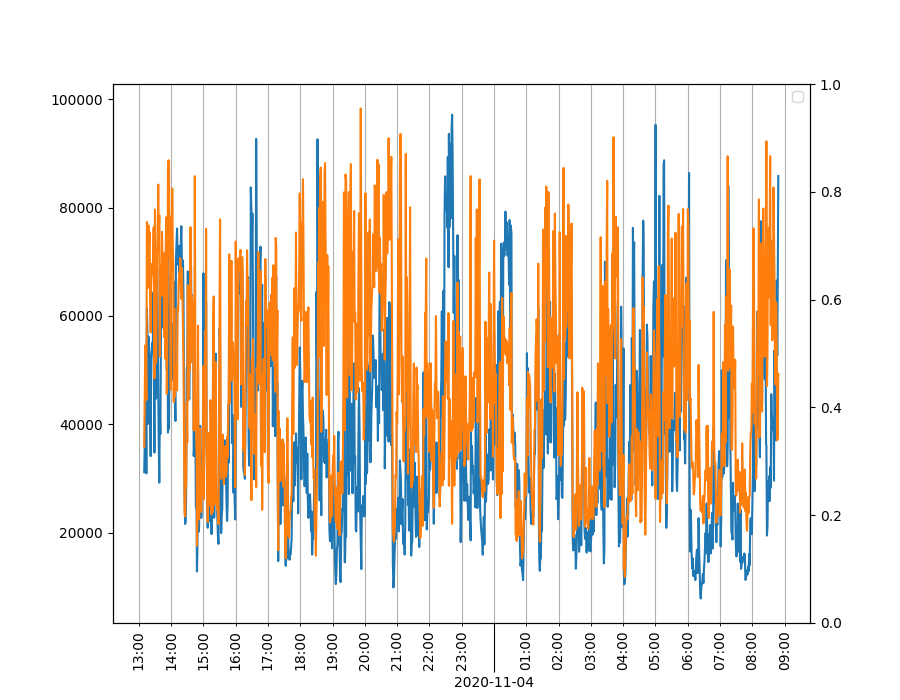

No handles with labels found to put in legend.


In [89]:
plt.figure()


plt.plot(data["hAccuracy"], label = "Horizontal Accuracy")
plt.plot(data["vAccuracy"], label = "Vertical Accuracy")
ax = plt.gca()


ax.xaxis.grid(True, which='both')
ax.tick_params(axis='x',which='major', length=35)
ax.tick_params(axis='x',which='minor', rotation=90)

ax2 = ax.twinx();
ax2.plot(data["opper"], label = "Opper", linewidth=1, color='blue')
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax2.xaxis.set_major_locator(mdates.DayLocator())
ax2.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
ax2.xaxis.set_minor_locator(mdates.HourLocator())
ax2.xaxis.grid(True, which='both')

plt.legend()

<IPython.core.display.Javascript object>


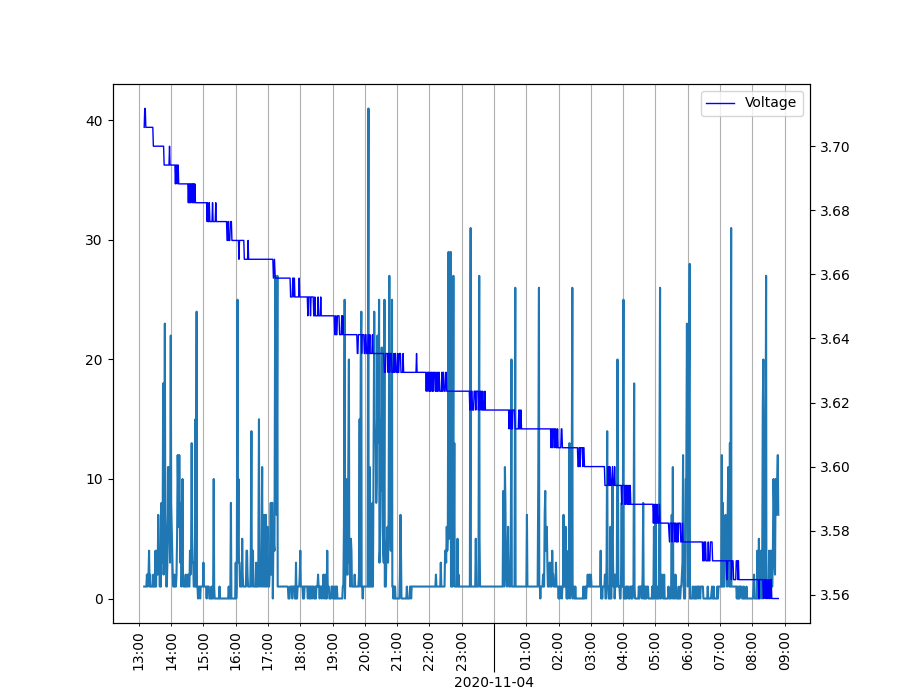

In [92]:
plt.figure()


plt.plot(data["SecondsToFix"], label = "Seconds To Fix")
ax = plt.gca()


ax.xaxis.grid(True, which='both')
ax.tick_params(axis='x',which='major', length=35)
ax.tick_params(axis='x',which='minor', rotation=90)

ax2 = ax.twinx();
ax2.plot(data["CalcVoltage"], label = "Voltage", linewidth=1, color='blue')
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax2.xaxis.set_major_locator(mdates.DayLocator())
ax2.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
ax2.xaxis.set_minor_locator(mdates.HourLocator())
ax2.xaxis.grid(True, which='both')

plt.legend()
plt.savefig("20mAccuracyBattery.png")